In [17]:
import os
os.chdir('/home/lewis/PhD/compounds-research')
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from importlib import reload

from simulator.engine import dai_rate_model
%matplotlib inline

<IPython.core.display.Javascript object>


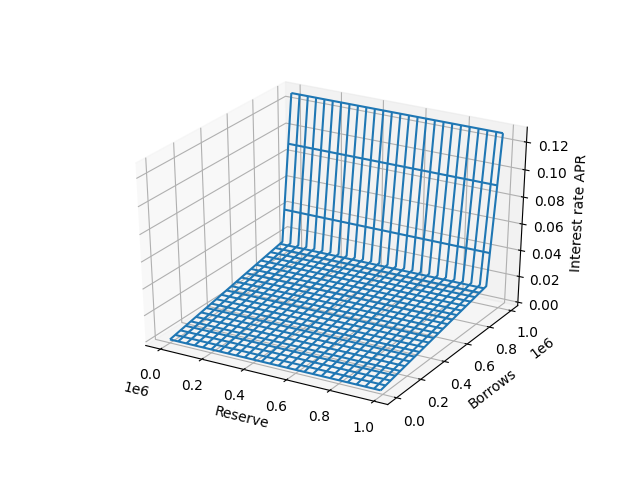

In [18]:
#Plot the borrows function
fig = plt.figure()
ax = fig.gca(projection='3d')

reserves = np.arange(0, 1000000, 10000)
supply = 1000000
borrows = np.arange(0, 1000000, 10000)
R, B = np.meshgrid(reserves, borrows)

br_dict = {}
supply_upscaled = supply * int(1e18)
for b in borrows:
    b_upscaled = int(b) * int(1e18)
    for r in reserves:
        r_upscaled = int(r) * int(1e18)
        cash_upscaled = supply_upscaled - b_upscaled + r_upscaled
        br = dai_rate_model.get_borrow_rate(cash=cash_upscaled, borrows=b_upscaled, reserves=r_upscaled)
        br_downscaled_APR = (br) / int(1e18)* dai_rate_model.BLOCKS_PER_YEAR
        # util = dai_rate_model.utilization_rate(cash = cash_upscaled, borrows=b_upscaled, reserves=r_upscaled) / int(1e18)
        br_dict[(r_upscaled,b_upscaled)] = br_downscaled_APR

Z_br = np.zeros((100,100))

for key in br_dict:
    i = int(key[0] / int(1e22))
    j = int(key[1] / int(1e22))
    Z_br[j][i] = br_dict[key] # Check this is the correct way around

surf = ax.plot_wireframe(X=R, Y=B, Z=Z_br, rcount = 30, ccount= 30, antialiased=True)
# surf = ax.plot_surface(R, B, Z, rcount = 50, ccount= 50, cmap=cm.winter, linewidth=5, antialiased=True)

ax.set_xlabel('Reserve')
ax.set_ylabel('Borrows')
ax.set_zlabel('Interest rate APR')
plt.show()

#State the objective function for interest rates. what are we trying to maximize? Thing to include: stability, efficiency, responsiveness, economic security?
#Propose a new interest rate model that would maximize these factors, for each protocol given the supply and demand that was experienced, what would the interest rates look like? 
 # - Here, probably cannot make the assumption that supply and demand would remain the same, since these are endogenous to the original system parameters. However, could simulate the behaviour for random supply and demand, or normally distributed supply and demand?

<IPython.core.display.Javascript object>


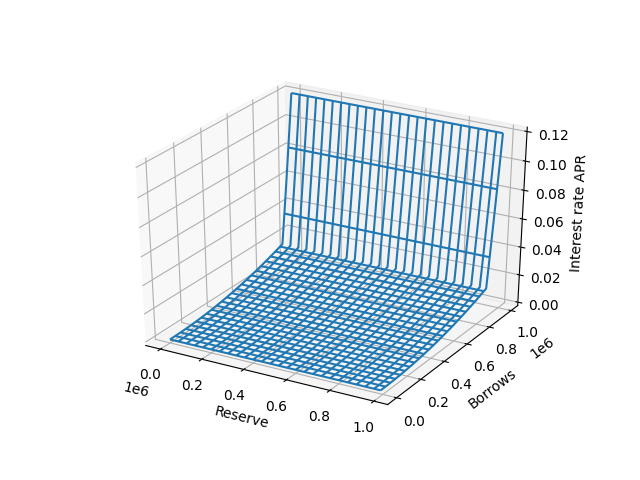

In [21]:
#Plot the supply function - amount saver makes as borrow changes
fig = plt.figure()
ax = fig.gca(projection='3d')

sr_dict = {}
supply_upscaled = supply * int(1e18)
for b in borrows:
    b_upscaled = int(b) * int(1e18)
    for r in reserves:
        r_upscaled = int(r) * int(1e18)
        cash_upscaled = supply_upscaled - b_upscaled + r_upscaled
        br = dai_rate_model.get_supply_rate(cash=cash_upscaled, borrows=b_upscaled, reserves=r_upscaled, reserve_factor=dai_rate_model.RESERVE_FACTOR)
        sr_downscaled_APY = (br) / int(1e18)* dai_rate_model.BLOCKS_PER_YEAR
        sr_dict[(r_upscaled,b_upscaled)] = sr_downscaled_APY

Z_sr = np.zeros((100,100))

for key in sr_dict:
    i = int(key[0] / int(1e22))
    j = int(key[1] / int(1e22))
    Z_sr[j][i] = sr_dict[key] # CHECK this is the correct way around

surf = ax.plot_wireframe(R, B, Z_sr, rcount = 30, ccount= 30, antialiased=True)
# surf = ax.plot_surface(R, B, Z, rcount = 50, ccount= 50, cmap=cm.winter, linewidth=5, antialiased=True)

ax.set_xlabel('Reserve')
ax.set_ylabel('Borrows')
ax.set_zlabel('Interest rate APR')
plt.show()

<IPython.core.display.Javascript object>


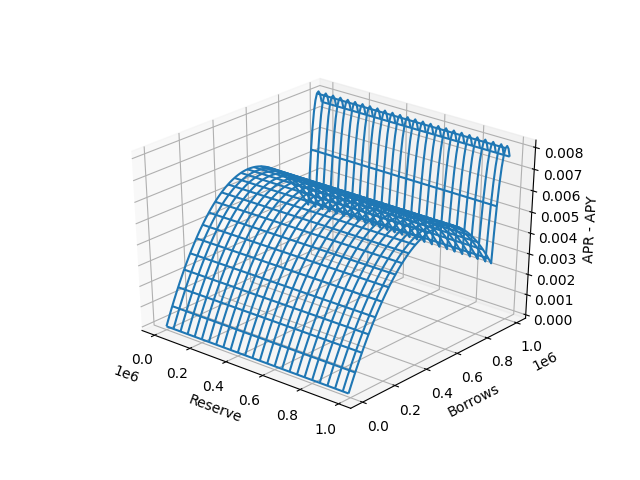

In [22]:
#Plot the delta between APY and APR
#Plot the supply function - amount saver makes as borrow changes
fig = plt.figure()
ax = fig.gca(projection='3d')

Z_delta = Z_br - Z_sr

surf = ax.plot_wireframe(R, B, Z_delta, rcount = 30, ccount= 30, antialiased=True)
# surf = ax.plot_surface(R, B, Z, rcount = 50, ccount= 50, cmap=cm.winter, linewidth=5, antialiased=True)

ax.set_xlabel('Reserve')
ax.set_ylabel('Borrows')
ax.set_zlabel('APR - APY')
plt.show()